In [86]:
import pandas as pd
import numpy as np

In [87]:
training=pd.read_csv('house-prices-advanced-regression-techniques/train.csv',index_col='Id')
test_x=pd.read_csv('house-prices-advanced-regression-techniques/test.csv',index_col='Id')
train_x=training.iloc[:,:-1]
train_y=training.iloc[:,-1]
test_y=pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv',index_col='Id')

In [88]:
data=pd.concat([train_x,test_x],keys=["train","test"])
#data[['MSSubClass','MoSold','OverallCond','OverallQual']]=data[['MSSubClass','MoSold','OverallCond','OverallQual']].astype('object')
data=data.fillna({'Alley': 'NA', 'FireplaceQu': 'NA', 'PoolQC': 'NA', 'Fence': 'NA', 'MiscFeature': 'NA',
                                         'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtExposure': 'NA', 'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA',
                                         'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA'})
na_l=data.columns[data.isna().any()].tolist()
me=training[na_l].select_dtypes("float64").median()
for item in training[na_l].select_dtypes("object"):
    tem=data[item].value_counts()
    tem1=tem.idxmax()
    data[item]=tem1
for item in me.index:
    data[item]=data[item].replace(np.nan,me[item])
train_x=data.loc["train"]
test_x=data.loc["test"]
training=train_x.join(train_y)
testing=test_x.join(test_y)
training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


C:\Users\SAJIN~1.LAP\AppData\Local\Temp/ipykernel_11584/1165996475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['GrLivArea']=np.log(train_x['GrLivArea'])
C:\Users\SAJIN~1.LAP\AppData\Local\Temp/ipykernel_11584/1165996475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['GrLivArea']=np.log(test_x['GrLivArea'])
C:\Users\Sajin.LAPTOP-RE0DL8PH\anaconda3\envs\CS675\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334771
BsmtFinSF1       0.386420
GarageYrBlt      0.466754
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

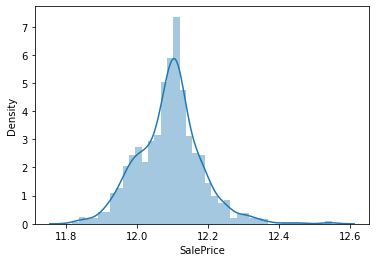

In [89]:
import seaborn as sns
from scipy.stats import skew
train_y=np.log(train_y)
test_y=np.log(test_y)
train_x['GrLivArea']=np.log(train_x['GrLivArea'])
test_x['GrLivArea']=np.log(test_x['GrLivArea'])
#sns.distplot(training['SalePrice'])
sns.distplot(np.log(testing['SalePrice']))
c=training.corr()
c['SalePrice'].sort_values()

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
regressor = LinearRegression()
regressor.fit(train_x['GrLivArea'].values.reshape(-1,1), train_y)
y_pred = regressor.predict(test_x['GrLivArea'].values.reshape(-1,1))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print('R-squared Error:', metrics.r2_score(test_y.values.reshape(-1,1), y_pred))


Mean Absolute Error: 0.1993395539715537
Mean Squared Error: 0.06331790435353175
Root Mean Squared Error: 0.25163049170069146
R-squared Error: -6.813203944980623
